# 宝塚記念

In [45]:
%run 0.2_Function.ipynb

In [54]:
# 2005-2025 東京
df = result_df("2005", "2025", ["阪"])

In [55]:
distance = df["距離"] == 2200
ground_type = df["芝・ダ"] == "芝"
#arrival = df["確定着順"] == 1
race_class = df["クラスコード"] >= 100
ng_code = df['異常コード'] == 0
cond = distance & ground_type & ng_code & race_class

In [56]:
df = df[cond]

In [57]:
df[cond].sort_values('走破タイム')[['レース日','馬名', '走破タイム', '上がり3Fタイム','PCI', '馬場状態','レース名', 'クラスコード', '確定着順']]

/var/folders/tn/j8hdvbw52z938h6gxwsg4b4w0000gn/T/ipykernel_7880/1094287533.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond].sort_values('走破タイム')[['レース日','馬名', '走破タイム', '上がり3Fタイム','PCI', '馬場状態','レース名', 'クラスコード', '確定着順']]


,レース日,馬名,走破タイム,上がり3Fタイム,PCI,馬場状態,レース名,クラスコード,確定着順
94980,2022-06-26,タイトルホルダー,129.7,36.1,47.2,良,宝塚記念G1,195,1
94984,2022-06-26,ヒシイグアス,130.0,35.9,48.3,良,宝塚記念G1,195,2
31458,2011-06-26,アーネストリー,130.1,35.1,51.5,良,宝塚記念G1,195,1
129516,2020-11-15,ラッキーライラック,130.3,33.9,56.6,良,エリザベG1,195,1
94989,2022-06-26,ディープボンド,130.3,36.6,46.0,良,宝塚記念G1,195,4
...,...,...,...,...,...,...,...,...,...
104416,2020-06-28,アフリカンゴールド,141.8,43.5,34.7,稍,宝塚記念G1,195,18
100631,2015-03-01,メイショウリンクス,141.9,38.6,50.4,重,すみれＳ,131,8
100633,2015-03-01,ヤマカツボーイ,142.0,39.0,49.0,重,すみれＳ,131,9
62558,2006-02-26,フサイチダイナソー,142.9,38.1,53.1,不,すみれＳ,131,8


In [58]:
df["クラス"] = df["クラスコード"].map(class_code_labels)

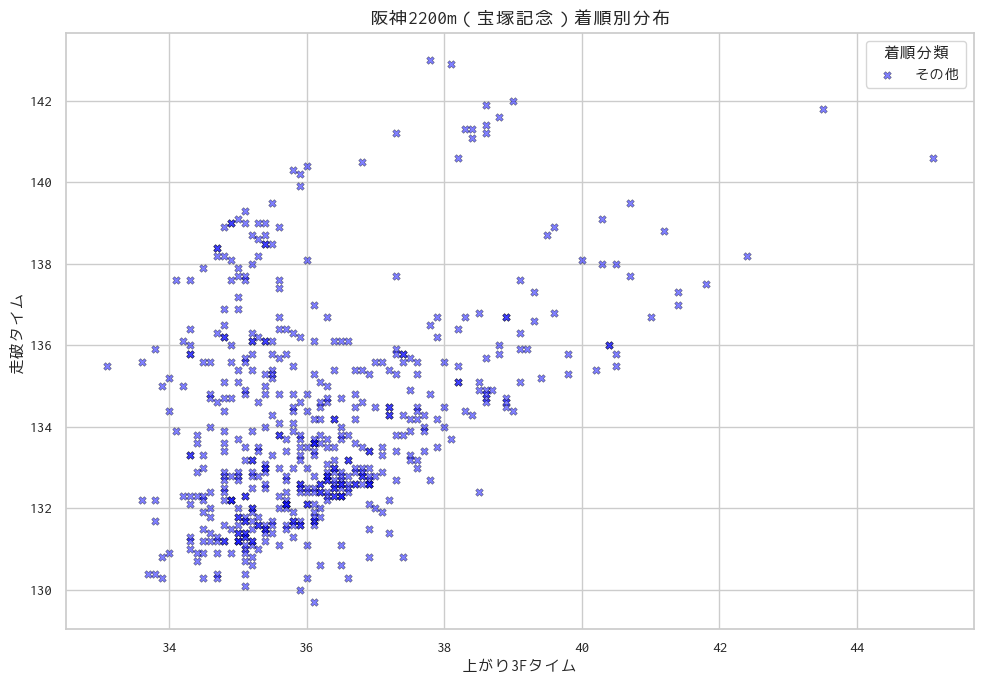

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 数値変換
df["走破タイム"] = pd.to_numeric(df["走破タイム"], errors="coerce")
df["上がり3Fタイム"] = pd.to_numeric(df["上がり3Fタイム"], errors="coerce")
df["確定着順"] = pd.to_numeric(df["確定着順"], errors="coerce")

# 阪神2200mでフィルタ
df = df[(df["場所"] == "阪神") & (df["距離"] == 2200)]

# 可視化対象のカラムに欠損がある行を除去
df = df.dropna(subset=["走破タイム", "上がり3Fタイム", "確定着順"])

# 着順カテゴリを作成
def classify(row):
    if row["レース名"] == "宝塚記念" and row["確定着順"] == 1:
        return "宝塚記念 1着"
    elif row["レース名"] == "宝塚記念" and row["確定着順"] in [2, 3]:
        return "宝塚記念 2-3着"
    else:
        return "その他"

df["分類"] = df.apply(classify, axis=1)

# プロット
plt.figure(figsize=(10, 7))

# マーカーと色の設定
palette = {
    "宝塚記念 1着": "red",
    "宝塚記念 2-3着": "green",
    "その他": "blue"
}
markers = {
    "宝塚記念 1着": "o",
    "宝塚記念 2-3着": "s",
    "その他": "X"
}
alphas = {
    "宝塚記念 1着": 1.0,
    "宝塚記念 2-3着": 0.9,
    "その他": 0.5
}

# グループごとに描画
for label in df["分類"].unique():
    subset = df[df["分類"] == label]
    sns.scatterplot(
        data=subset,
        x="上がり3Fタイム",
        y="走破タイム",
        label=label,
        color=palette[label],
        marker=markers[label],
        alpha=alphas[label],
        edgecolor="black",
        s=30  # マーカーサイズ
    )

# 軸とタイトル
plt.xlabel("上がり3Fタイム")
plt.ylabel("走破タイム")
plt.title("阪神2200m（宝塚記念）着順別分布", fontsize=14)
plt.legend(title="着順分類")
plt.tight_layout()
plt.show()

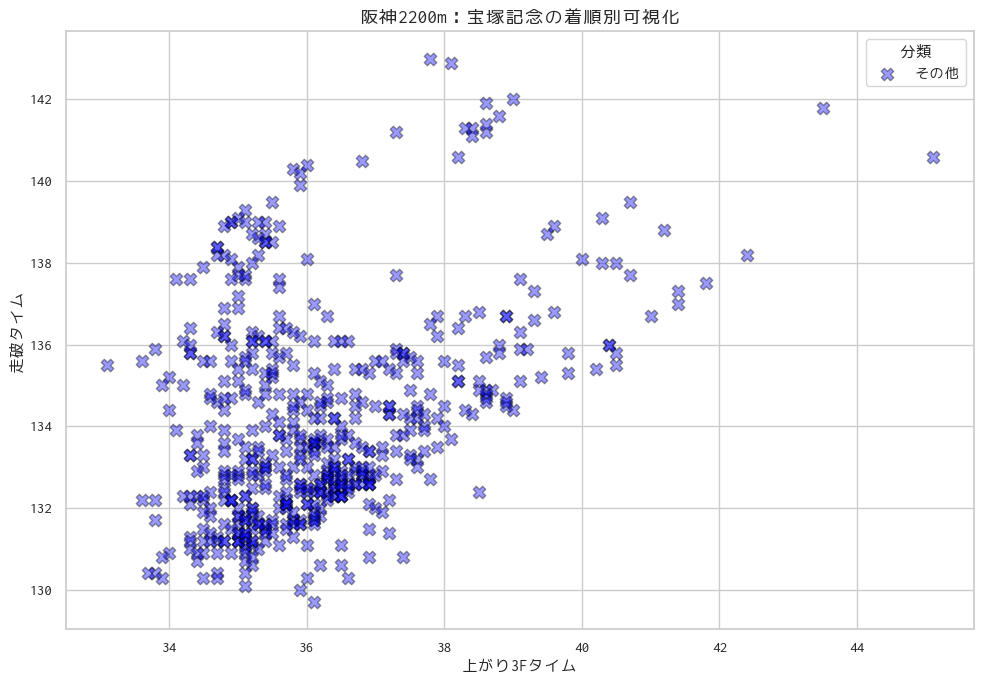

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数値変換
df["走破タイム"] = pd.to_numeric(df["走破タイム"], errors="coerce")
df["上がり3Fタイム"] = pd.to_numeric(df["上がり3Fタイム"], errors="coerce")
df["確定着順"] = pd.to_numeric(df["確定着順"], errors="coerce")

# 欠損除去
df = df.dropna(subset=["走破タイム", "上がり3Fタイム", "確定着順"])

# 分類列を作成
def classify(row):
    if row["レース名"] == "宝塚記念" and row["確定着順"] == 1:
        return "宝塚記念 1着"
    elif row["レース名"] == "宝塚記念" and row["確定着順"] in [2, 3]:
        return "宝塚記念 2-3着"
    else:
        return "その他"

df["分類"] = df.apply(classify, axis=1)

# 色・マーカー・透明度マップ
palette = {
    "宝塚記念 1着": "red",
    "宝塚記念 2-3着": "green",
    "その他": "blue"
}
markers = {
    "宝塚記念 1着": "o",
    "宝塚記念 2-3着": "s",
    "その他": "X"
}
alphas = {
    "宝塚記念 1着": 1.0,
    "宝塚記念 2-3着": 0.8,
    "その他": 0.4
}

# 描画
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font="Ricty Diminished")

# 分類ごとに個別にプロット（色とalphaを確実に適用）
for label in df["分類"].unique():
    subset = df[df["分類"] == label]
    plt.scatter(
        subset["上がり3Fタイム"],
        subset["走破タイム"],
        label=label,
        color=palette[label],
        marker=markers[label],
        alpha=alphas[label],
        edgecolors="black",
        s=80
    )

# 軸・タイトル・凡例
plt.xlabel("上がり3Fタイム")
plt.ylabel("走破タイム")
plt.title("阪神2200m：宝塚記念の着順別可視化", fontsize=14)
plt.legend(title="分類")
plt.tight_layout()
plt.show()